In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual settings
sns.set(style="whitegrid")
%matplotlib inline

# Load the dataset
df = pd.read_csv("/content/Cleaned_Titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,True,False,True
1,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,False,False,True
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,False,False,True
3,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,True,False,True
4,6,0,3,"Moran, Mr. James",-0.104637,0,0,330877,-0.478116,True,True,False


In [10]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [2]:
# Dataset shape and column info
print(df.shape)
print(df.info())

# Descriptive statistics
df.describe(include='all')


(775, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Ticket       775 non-null    object 
 8   Fare         775 non-null    float64
 9   Sex_male     775 non-null    bool   
 10  Embarked_Q   775 non-null    bool   
 11  Embarked_S   775 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 56.9+ KB
None


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
count,775.000000,775.000000,775.00000,775,775.000000,775.000000,775.000000,775,775.000000,775,775,775
unique,NaN,NaN,NaN,775,NaN,NaN,NaN,632,NaN,2,2,2
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",NaN,NaN,NaN,347082,NaN,True,False,True
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,7,NaN,531,700,584
mean,445.806452,0.339355,2.48000,NaN,-0.047099,0.437419,0.340645,NaN,-0.289579,NaN,NaN,NaN
std,260.116285,0.473796,0.73439,NaN,0.982304,0.899838,0.785914,NaN,0.273391,NaN,NaN,NaN
min,1.000000,0.000000,1.00000,NaN,-2.224156,0.000000,0.000000,NaN,-0.648422,NaN,NaN,NaN
25%,213.500000,0.000000,2.00000,NaN,-0.565736,0.000000,0.000000,NaN,-0.489442,NaN,NaN,NaN
50%,450.000000,0.000000,3.00000,NaN,-0.104637,0.000000,0.000000,NaN,-0.386671,NaN,NaN,NaN
75%,670.500000,1.000000,3.00000,NaN,0.356462,1.000000,0.000000,NaN,-0.124920,NaN,NaN,NaN


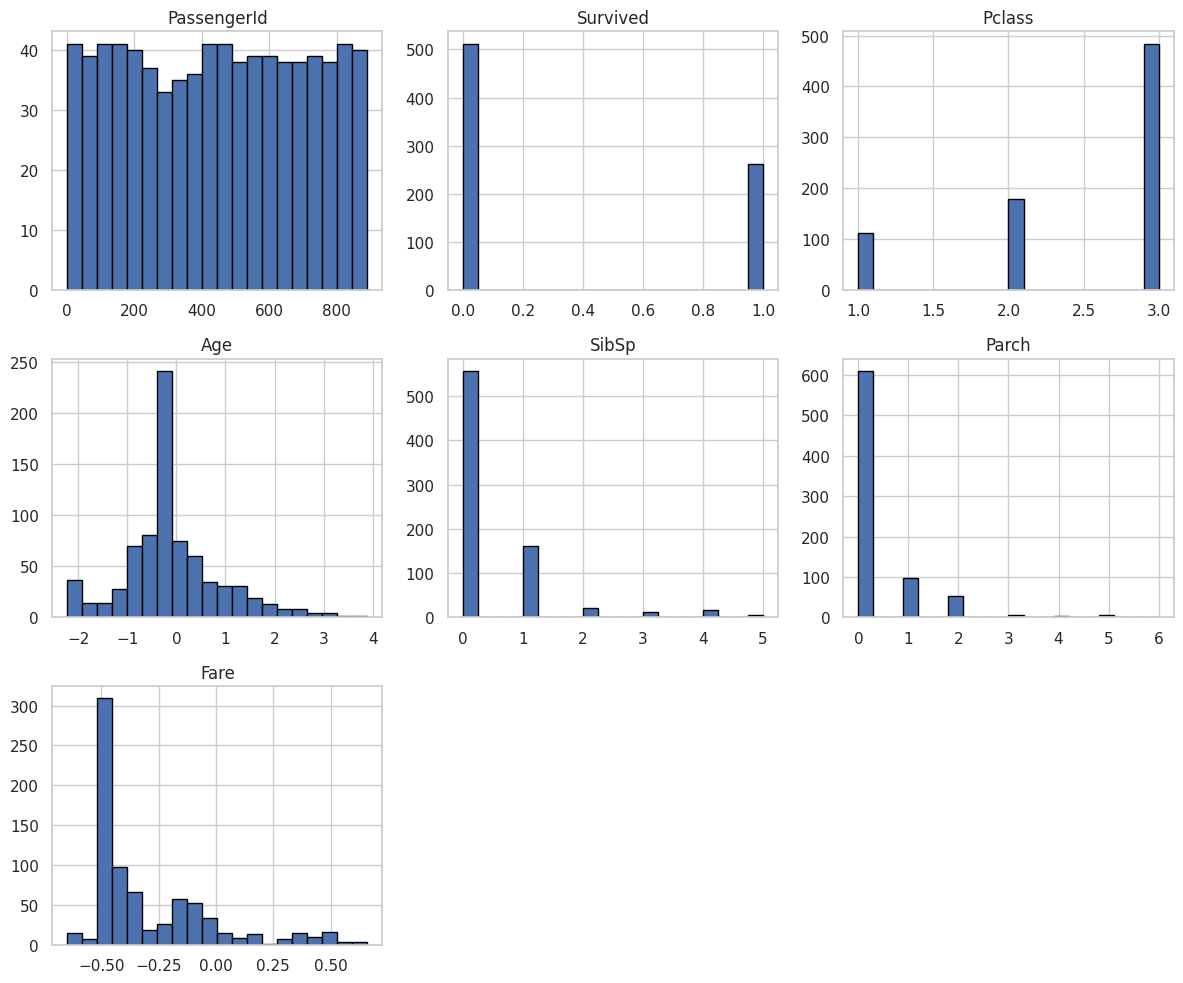

In [3]:
# Histograms for numeric columns
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

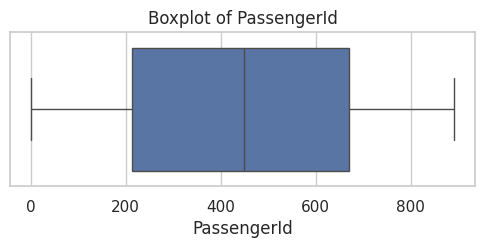

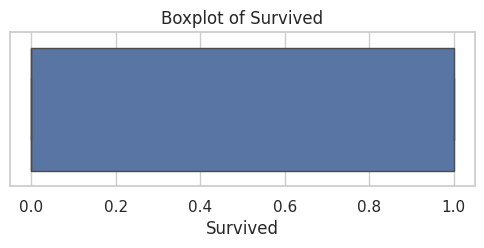

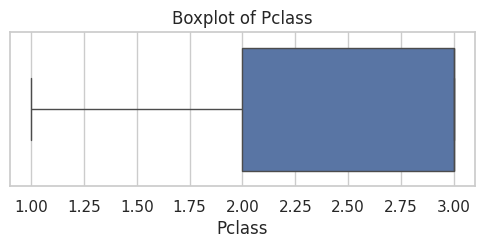

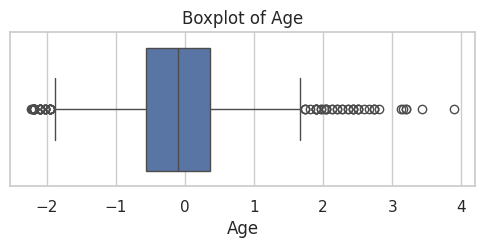

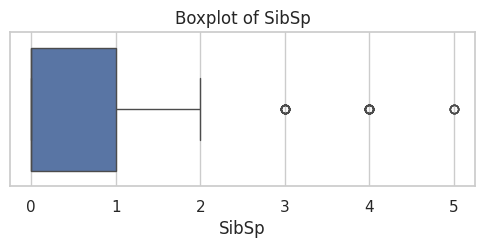

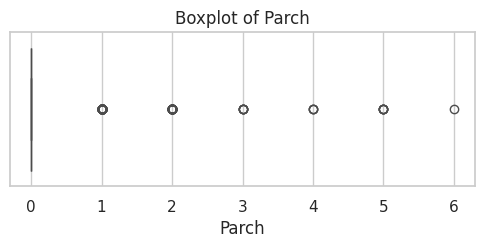

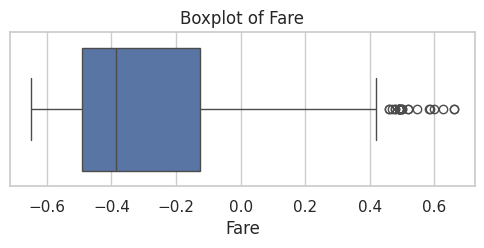

In [4]:
# Boxplots to detect outliers
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

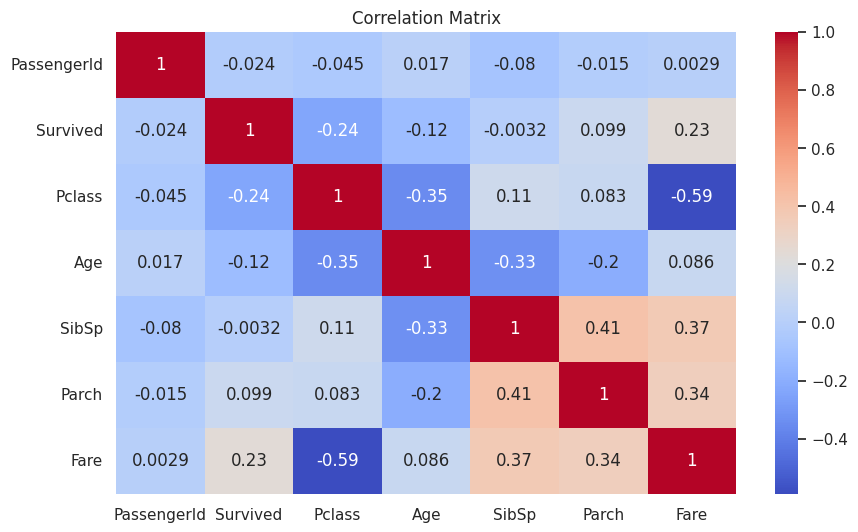

In [6]:
## Correlation matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

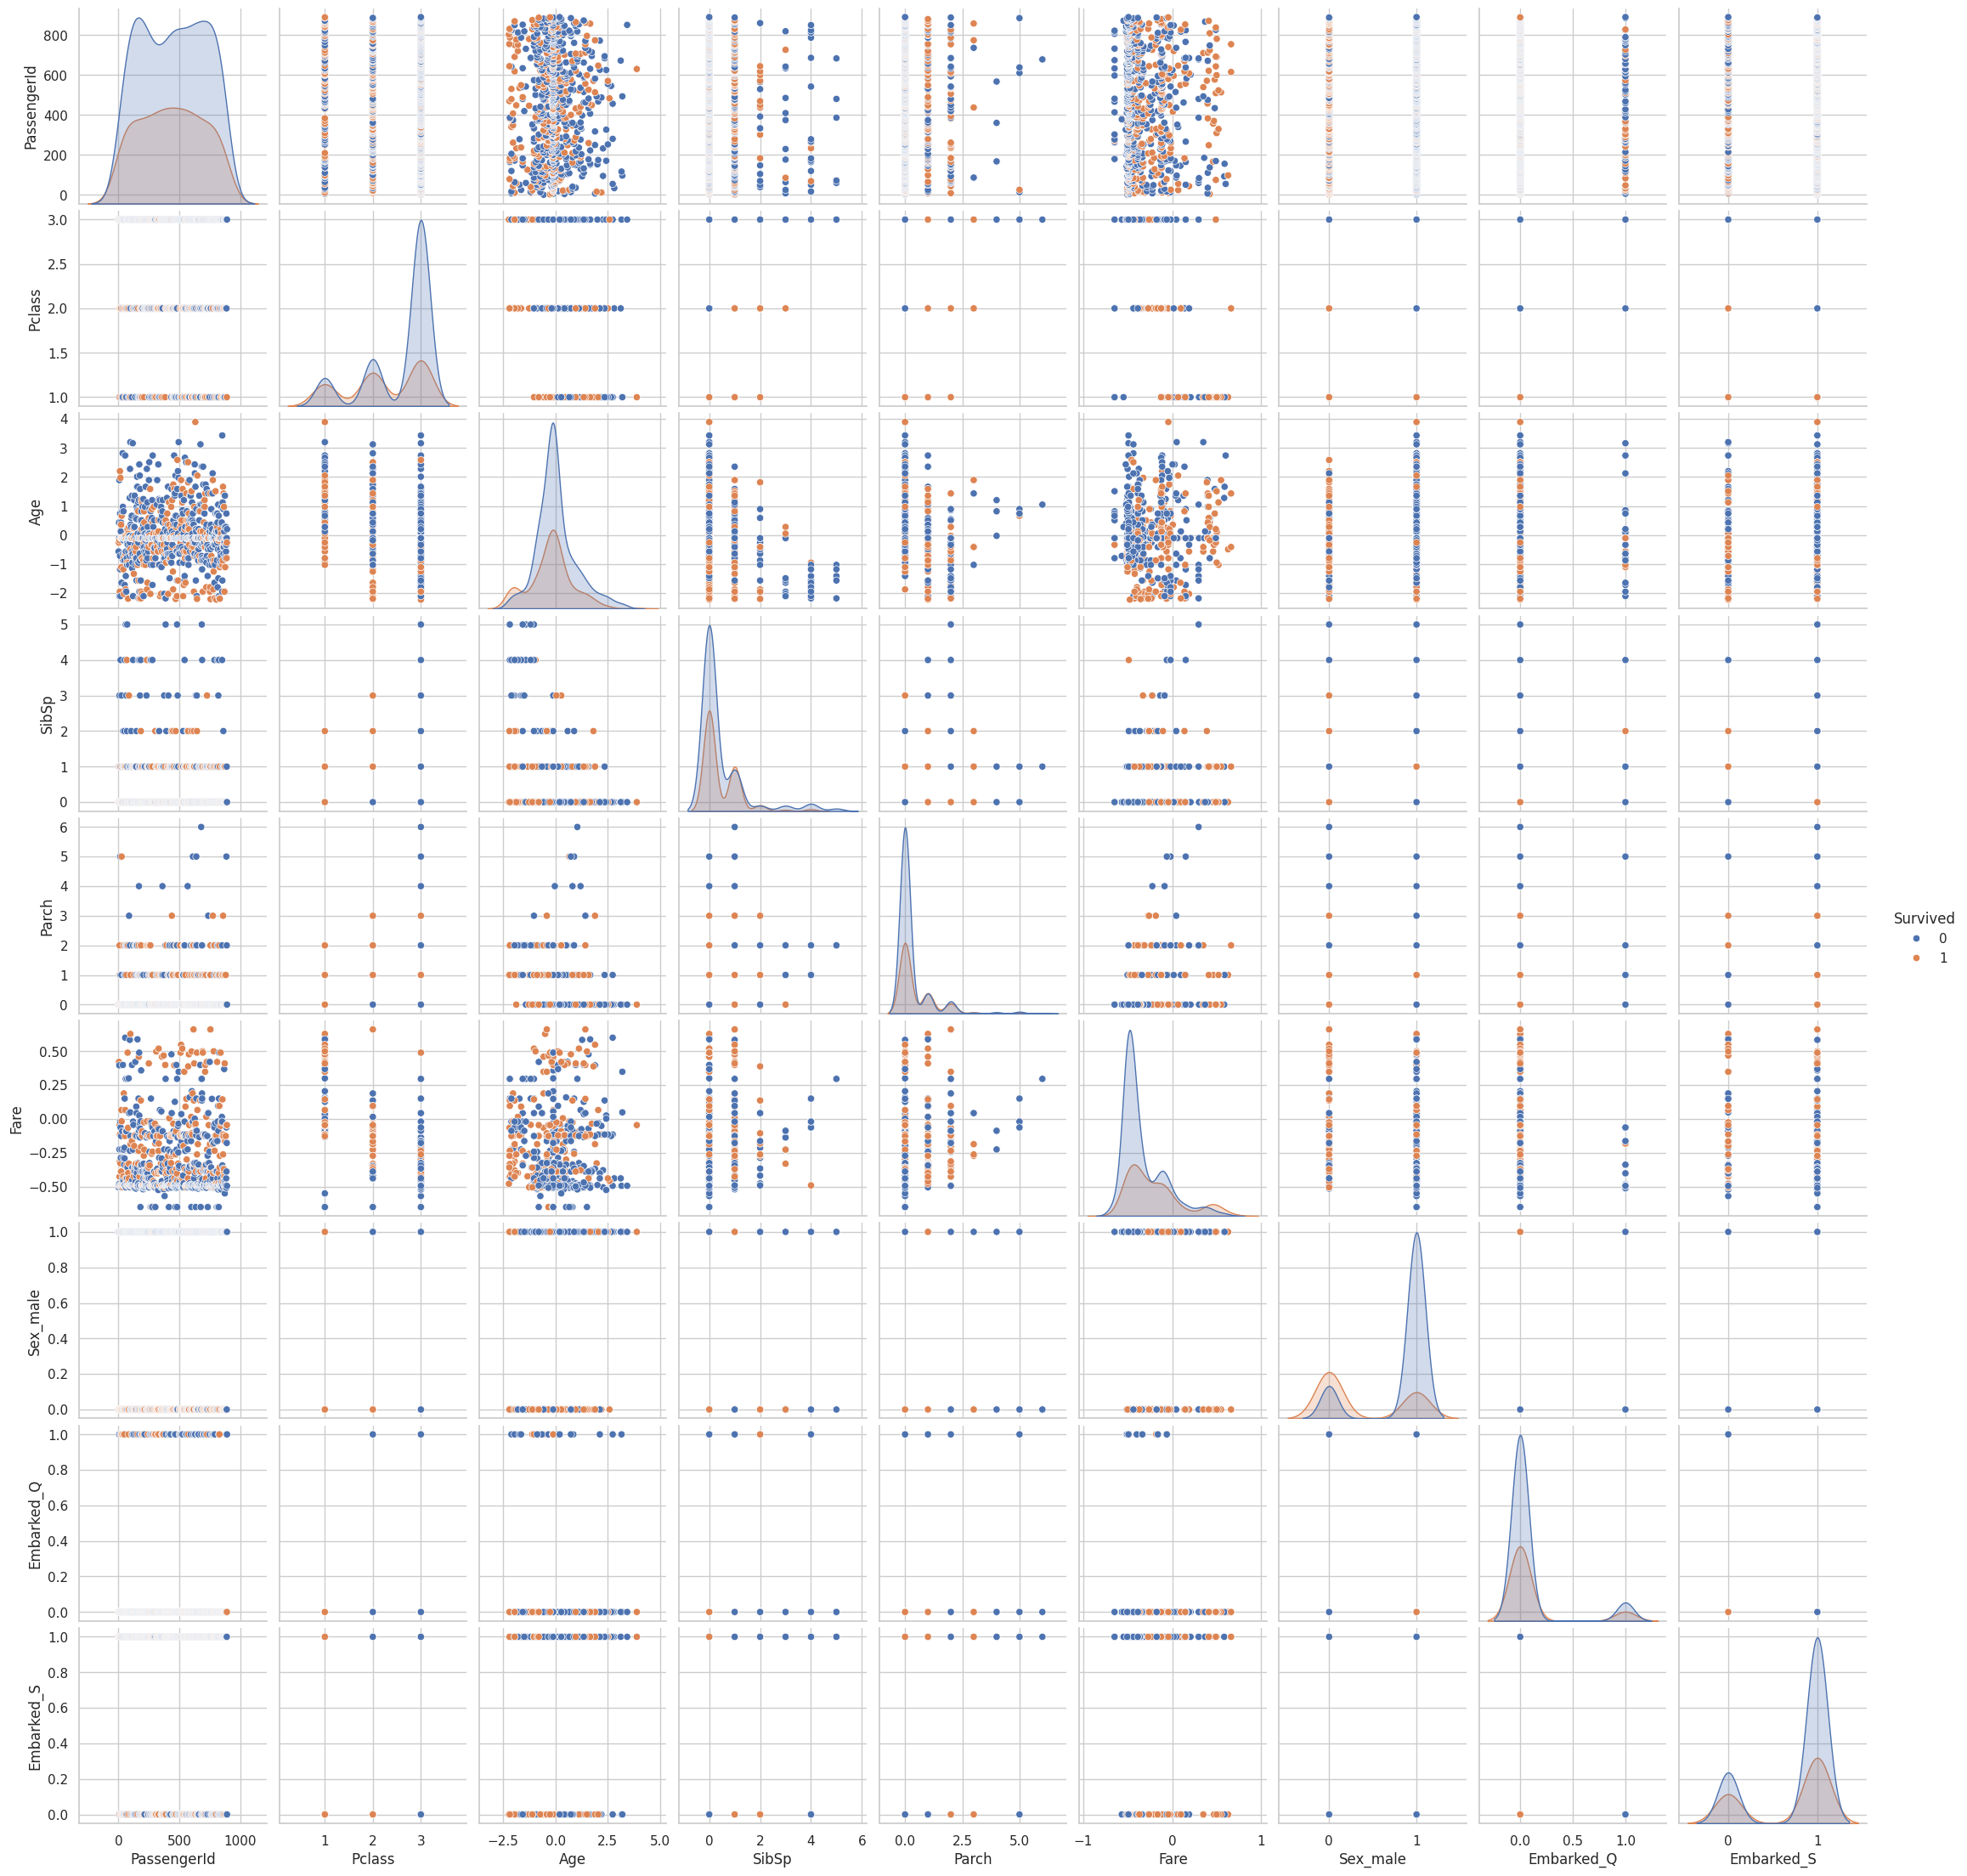

In [7]:
# Pairplot (optional for small datasets)
sns.pairplot(df, hue='Survived')  # If 'Survived' exists
plt.show()

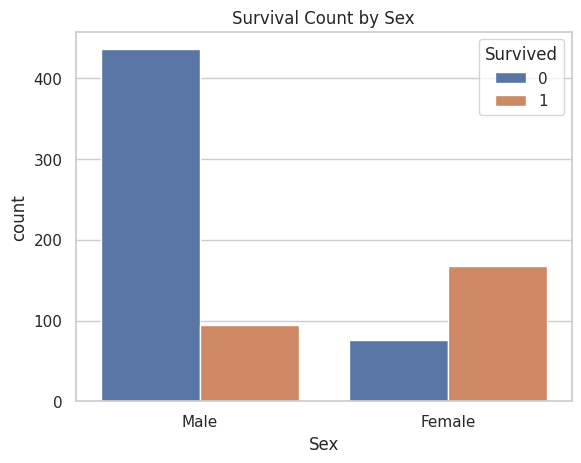

In [11]:
# Create a 'Sex' column from 'Sex_male'
df['Sex'] = df['Sex_male'].apply(lambda x: 'Male' if x == 1 else 'Female')

# Now plot survival count by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Sex")
plt.show()


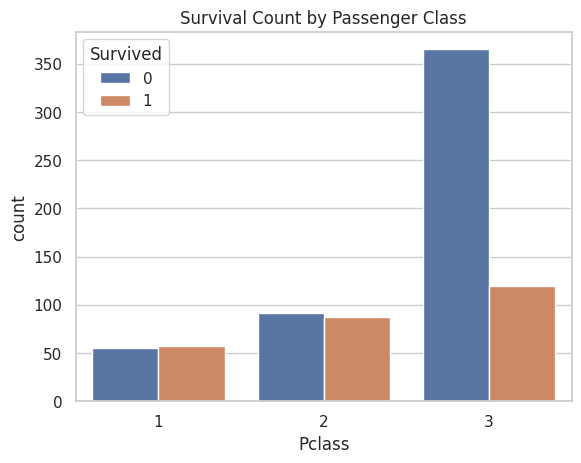

In [12]:
# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()

<ipython-input-14-e3a40651e7ea>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
<ipython-input-14-e3a40651e7ea>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)


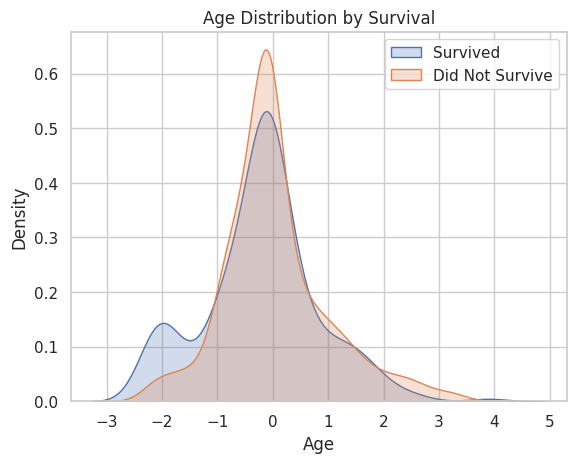

In [14]:

# Age distribution by survival
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], label='Survived', shade=True)
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], label='Did Not Survive', shade=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()